In [98]:
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
print(torch.__version__)

2.1.2+cu121


### 4.1 Classification

In [99]:
import sklearn
from sklearn.datasets import make_circles

# Make 1000 samples
n_samples = 1000

# Create Circles
X, y = make_circles(n_samples, 
                    noise=0.03,
                    random_state=42)

In [100]:
len(X), len(y)

(1000, 1000)

In [101]:
print(f'First 5 samples of X:\n {X[:5]}')
print(f'First 5 samples of y:\n {y[:5]}')

First 5 samples of X:
 [[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
First 5 samples of y:
 [1 1 1 1 0]


In [102]:
# Make DataFrame of circle dta
circles = pd.DataFrame({"X1":X[:,0], 
                        "X2":X[:,1],
                        "label":y})
circles.head(10)

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


In [103]:
circles.label.value_counts()

label
1    500
0    500
Name: count, dtype: int64

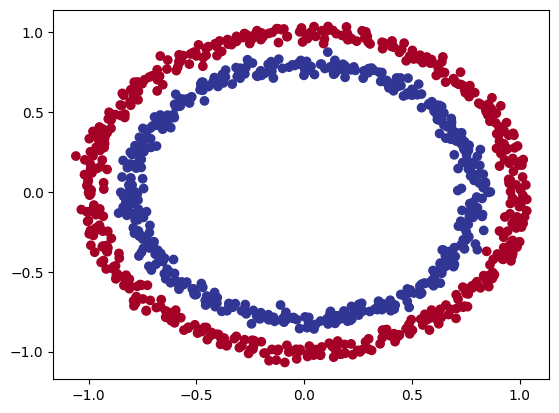

In [104]:
# Visualize
plt.scatter(x=X[:,0],
            y=X[:,1],
            c=y,
            cmap=plt.cm.RdYlBu)

### 4.2 Check input and output shape

In [105]:
X.shape, y.shape

((1000, 2), (1000,))

In [106]:
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [107]:
# View the first example of features and labels
X_sample = X[0]
y_sample = y[0]

print(f'Values for one sample of X: {X_sample} and the same for y: {y_sample}')
print(f'Shapes for one sample of X: {X_sample.shape} and the same for y: {y_sample.shape}')

Values for one sample of X: [0.75424625 0.23148074] and the same for y: 1
Shapes for one sample of X: (2,) and the same for y: ()


### 4.3 Turn data into tensors and create train and test splits

In [108]:
type(X), X.dtype

(numpy.ndarray, dtype('float64'))

In [109]:
# Turn data into tensors
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

X[:5], y[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

In [110]:
# Split data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42
                                                    )

In [111]:
len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

In [112]:
n_samples

1000

### 4.4 Building a model

In [113]:
import torch
from torch import nn

# Make device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [114]:
X_train

tensor([[ 0.6579, -0.4651],
        [ 0.6319, -0.7347],
        [-1.0086, -0.1240],
        ...,
        [ 0.0157, -1.0300],
        [ 1.0110,  0.1680],
        [ 0.5578, -0.5709]])

In [115]:
y_train[:5]

tensor([1., 0., 0., 0., 1.])

In [116]:
# 1. construct a model that subclasses nn.Module
class CircleModelV0(nn.Module):
    def __init__(self):
        super().__init__()
        #2. Create 2 nn.Linear layers capable of handling the shapes of our data
        # # [Method1] 
        # self.layer_1 = nn.Linear(in_features=2, out_features=5) 
        # self.layer_2 = nn.Linear(in_features=5, out_features=1) # must match in_feature with previous out_features
        
        # [Method2]
        self.two_linear_layers = nn.Sequential(
            nn.Linear(in_features=2, out_features=5),
            nn.Linear(in_features=5, out_features=1),            
        )
        
    # 3. Define a forward() method that outlines the forwards pass
    def forward(self, x):
        # return self.layer_2(self.layer_1(x)) # [Method1] x -> layer_1 -> layer_2
        return two_linear_layers  # [Method2] 
    
    # 4. instatiate an instance of our model class and send it to the target device
model_0 = CircleModelV0().to(device)
model_0           

CircleModelV0(
  (two_linear_layers): Sequential(
    (0): Linear(in_features=2, out_features=5, bias=True)
    (1): Linear(in_features=5, out_features=1, bias=True)
  )
)

In [117]:
device

'cuda'

In [118]:
next(model_0.parameters()).device

device(type='cuda', index=0)

In [119]:
# Using nn.Sequential()
model_0 = nn.Sequential(
    nn.Linear(in_features=2, out_features=5),
    nn.Linear(in_features=5, out_features=1),    
).to(device)

model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [120]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.0829, -0.2872],
                      [ 0.4691, -0.5582],
                      [-0.3260, -0.1997],
                      [-0.4252,  0.0667],
                      [-0.6984,  0.6386]], device='cuda:0')),
             ('0.bias',
              tensor([-0.6007,  0.5459,  0.1177, -0.2296,  0.4370], device='cuda:0')),
             ('1.weight',
              tensor([[ 0.0697,  0.3613,  0.0489, -0.1410,  0.1202]], device='cuda:0')),
             ('1.bias', tensor([-0.1213], device='cuda:0'))])

In [121]:
# Make predictions
with torch.inference_mode():
    untrained_preds = model_0(X_test.to(device))
print(f'Length of prediction :{len(untrained_preds)}, shape:{untrained_preds.shape}')
print(f'Length of test sample:{len(X_test)}, shape:{X_test.shape}')
print(f'\nFirst 10 prediction\n:{untrained_preds[:10]}')
print(f'\nFirst 10 prediction\n:{torch.round(untrained_preds[:10])}')
print(f'\nFirst 10 labels\n:{X_test[:10]}')

Length of prediction :200, shape:torch.Size([200, 1])
Length of test sample:200, shape:torch.Size([200, 2])

First 10 prediction
:tensor([[-0.0338],
        [-0.0309],
        [ 0.0894],
        [-0.0692],
        [ 0.2967],
        [ 0.2968],
        [ 0.1405],
        [ 0.2178],
        [ 0.0805],
        [-0.0284]], device='cuda:0')

First 10 prediction
:tensor([[-0.],
        [-0.],
        [0.],
        [-0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [-0.]], device='cuda:0')

First 10 labels
:tensor([[-0.3752,  0.6827],
        [ 0.0154,  0.9600],
        [-0.7028, -0.3147],
        [-0.2853,  0.9664],
        [ 0.4024, -0.7438],
        [ 0.6323, -0.5711],
        [ 0.8561,  0.5499],
        [ 1.0034,  0.1903],
        [-0.7489, -0.2951],
        [ 0.0538,  0.9739]])


### 4.5 Setting train and test

In [122]:

# Setup the loss function
# loss_fn = nn.BCELoss()  # BCELoss = requires inputs to have gone through the sigmoid activation function
loss_fn = nn.BCEWithLogitsLoss() # BCEWithLogitsLoss = sigmoid activation function build-in
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.1)

In [123]:
# Calculate accuracy
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct/len(y_pred))*100
    return acc

In [124]:
model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [125]:
# View the first 5 outputs of the forward pass
with torch.inference_mode():
    y_logits = model_0(X_test.to(device))[:5]
y_logits

tensor([[-0.0338],
        [-0.0309],
        [ 0.0894],
        [-0.0692],
        [ 0.2967]], device='cuda:0')

In [126]:
y_test[:5]

tensor([1., 0., 1., 0., 1.])

In [127]:
# Use the sigmoid activation function on our model logits to turn them into prediction probabilities
y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs

tensor([[0.4916],
        [0.4923],
        [0.5223],
        [0.4827],
        [0.5736]], device='cuda:0')

range-style rounding on them:  
* y_pred_probs >= 0.5, y=1 (class 1)
* y_pred_probs <  0.5, y=0 (class 0)

In [128]:
# Find the predicted labels
y_preds = torch.round(y_pred_probs)

# In full (logits -> pred probs -> pred labels)
y_pred_labels = torch.round(torch.sigmoid(model_0(X_test.to(device))[:5]))

# Check for equality
print(torch.eq(y_preds.squeeze(), y_pred_labels.squeeze()))

# Get rid of extra dimension
y_preds.squeeze()


tensor([True, True, True, True, True], device='cuda:0')


tensor([0., 0., 1., 0., 1.], device='cuda:0')

In [129]:
y_test[:5]

tensor([1., 0., 1., 0., 1.])

In [130]:
loss_fn

BCEWithLogitsLoss()

In [131]:
loss_fn_without_lgoits = nn.BCELoss()
loss_fn_without_lgoits

BCELoss()

In [132]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs = 100

X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
    '''
    Training
    '''
    model_0.train()
    
    # 1. Forward()
    y_logits = model_0(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits)) # turn logits -> pred probs -> pred label
    
    # 2. Calculate loss / accuracy
    # loss = loss_fn(torch.sigmoid(y_logits),    # nn.BCELoss expects prediction probabilities as input
    #                y_train)
    loss = loss_fn(y_logits,    # nn.BCEWithLogitLoss expects raw logits as input
                   y_train)
    acc = accuracy_fn(y_true=y_train,
                      y_pred=y_pred)
    
    # 3. Optimizer zero grad
    optimizer.zero_grad()
    
    # 4. Loss backward() # backpropagation
    loss.backward()
    
    # 5. Optimizer step # gradient descent
    optimizer.step()
    
    '''
    Test
    '''
    model_0.eval()
    with torch.inference_mode():
        # 1. Forward pass
        test_logits = model_0(X_test.to(device)).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))
        
        # 2. Calculate test loss/acc
        test_loss = loss_fn(test_logits,
                            y_test)
        test_acc = accuracy_fn(y_true=y_test,
                               y_pred=test_pred)
        
        # print out
        if epoch % 10 == 0:
            print(f'Epoch:{epoch} | Loss:{loss:.5f} | Acc: {acc:.2f} | Test loss : {test_loss:.5f} | Test acc : {test_acc:.5f}')

Epoch:0 | Loss:0.69796 | Acc: 51.88 | Test loss : 0.69440 | Test acc : 58.00000
Epoch:10 | Loss:0.69590 | Acc: 51.25 | Test loss : 0.69305 | Test acc : 53.00000
Epoch:20 | Loss:0.69490 | Acc: 51.62 | Test loss : 0.69254 | Test acc : 49.50000
Epoch:30 | Loss:0.69435 | Acc: 51.12 | Test loss : 0.69236 | Test acc : 49.50000
Epoch:40 | Loss:0.69401 | Acc: 50.88 | Test loss : 0.69232 | Test acc : 51.00000
Epoch:50 | Loss:0.69378 | Acc: 50.25 | Test loss : 0.69234 | Test acc : 50.00000
Epoch:60 | Loss:0.69362 | Acc: 50.00 | Test loss : 0.69239 | Test acc : 51.50000
Epoch:70 | Loss:0.69351 | Acc: 50.25 | Test loss : 0.69246 | Test acc : 51.00000
Epoch:80 | Loss:0.69342 | Acc: 49.88 | Test loss : 0.69254 | Test acc : 50.00000
Epoch:90 | Loss:0.69336 | Acc: 49.88 | Test loss : 0.69262 | Test acc : 53.00000


### 4.6 Make predictions and evaluate the model

In [133]:
import requests
from pathlib import Path 

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
    print("helper_functions.py already exists, skipping download")
else:
    print("Downloading helper_functions.py")
    request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
    with open("helper_functions.py", "wb") as f:
        f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

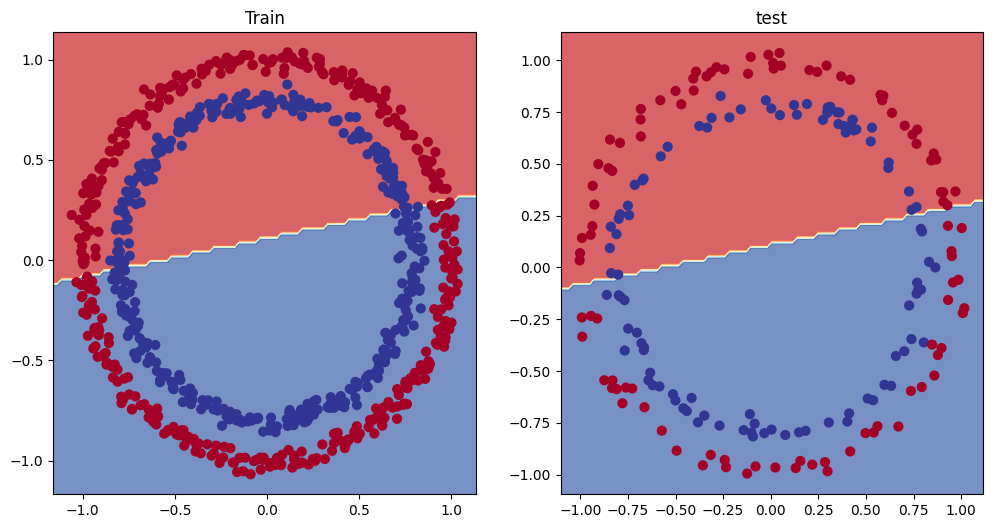

In [134]:
# plot decision boundary of the model
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title('Train')
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1,2,2)
plt.title('test')
plot_decision_boundary(model_0, X_test, y_test)

### 4.7 Improving the model

1. Add more layers - give the model more chance to learn about pattern
2. Add more hidden units - go from 5 hidden units to 10
3. Fit for longer
4. Changing the activation functions
5. Changing the learning rate
6. Changing the loss fucntion

In [135]:
# hidden unit 5 -> 10
# layers 2 -> 3
# epoch 100 -> 1000
class CircleModelV1(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2, out_features=10)
        self.layer_2 = nn.Linear(in_features=10, out_features=10)
        self.layer_3 = nn.Linear(in_features=10, out_features=1)
    
    def forward(self, x):
        # # Method 1
        # z = self.layer_1(x)
        # z = self.layer_2(z)
        # z = self.layer_3(z)
        # return z
        
        # # Method 2
        return self.layer_3(self.layer_2(self.layer_1(x))) # this way of writing operations leverage speed up
model_1 = CircleModelV1().to(device)
model_1

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [136]:
model_1.state_dict()

OrderedDict([('layer_1.weight',
              tensor([[ 0.5406,  0.5869],
                      [-0.1657,  0.6496],
                      [-0.1549,  0.1427],
                      [-0.3443,  0.4153],
                      [ 0.6233, -0.5188],
                      [ 0.6146,  0.1323],
                      [ 0.5224,  0.0958],
                      [ 0.3410, -0.0998],
                      [ 0.5451,  0.1045],
                      [-0.3301,  0.1802]], device='cuda:0')),
             ('layer_1.bias',
              tensor([-0.3258, -0.0829, -0.2872,  0.4691, -0.5582, -0.3260, -0.1997, -0.4252,
                       0.0667, -0.6984], device='cuda:0')),
             ('layer_2.weight',
              tensor([[ 0.2856, -0.2686,  0.2441,  0.0526, -0.1027,  0.1954,  0.0493,  0.2555,
                        0.0346, -0.0997],
                      [ 0.0850, -0.0858,  0.1331,  0.2823,  0.1828, -0.1382,  0.1825,  0.0566,
                        0.1606, -0.1927],
                      [-0.3130, -0.122

In [137]:
# Create loss function
loss_fn = nn.BCEWithLogitsLoss()

# Create optimizer
optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.1)

In [138]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epcohs = 1000

X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
    '''
    Train
    '''
    model_1.train()
    # 1. Forward pass
    y_logits = model_1(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits))
    
    # 2. Calculate the loss / acc
    loss = loss_fn(y_logits, y_train)
    acc = accuracy_fn(y_true=y_train,
                      y_pred=y_pred)
    
    # 3. optimizer zero grad
    optimizer.zero_grad()
    
    # 4. loss backward (back propagation)
    loss.backward()
    
    # 5. optimizer step
    optimizer.step()
    
    '''
    Test
    '''
    model_1.eval()
    with torch.inference_mode():
        # 1. forward pass
        test_logits = model_1(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))    

        # 2. Calcluate loss
        test_loss = loss_fn(test_logits, y_test)
        test_acc = accuracy_fn(y_true=y_test,
                               y_pred=test_pred)
    
    # print out
        if epoch % 10 == 0:
            print(f'Epoch:{epoch} | Loss:{loss:.5f} | Acc: {acc:.2f} | Test loss : {test_loss:.5f} | Test acc : {test_acc:.5f}')

Epoch:0 | Loss:0.69396 | Acc: 50.88 | Test loss : 0.69261 | Test acc : 51.00000
Epoch:10 | Loss:0.69369 | Acc: 50.25 | Test loss : 0.69270 | Test acc : 50.00000
Epoch:20 | Loss:0.69351 | Acc: 50.12 | Test loss : 0.69283 | Test acc : 49.50000
Epoch:30 | Loss:0.69339 | Acc: 50.50 | Test loss : 0.69297 | Test acc : 48.00000
Epoch:40 | Loss:0.69329 | Acc: 50.38 | Test loss : 0.69310 | Test acc : 49.00000
Epoch:50 | Loss:0.69322 | Acc: 49.88 | Test loss : 0.69324 | Test acc : 50.00000
Epoch:60 | Loss:0.69317 | Acc: 49.38 | Test loss : 0.69336 | Test acc : 51.50000
Epoch:70 | Loss:0.69312 | Acc: 49.38 | Test loss : 0.69348 | Test acc : 50.50000
Epoch:80 | Loss:0.69309 | Acc: 50.12 | Test loss : 0.69359 | Test acc : 50.00000
Epoch:90 | Loss:0.69307 | Acc: 50.50 | Test loss : 0.69370 | Test acc : 48.50000


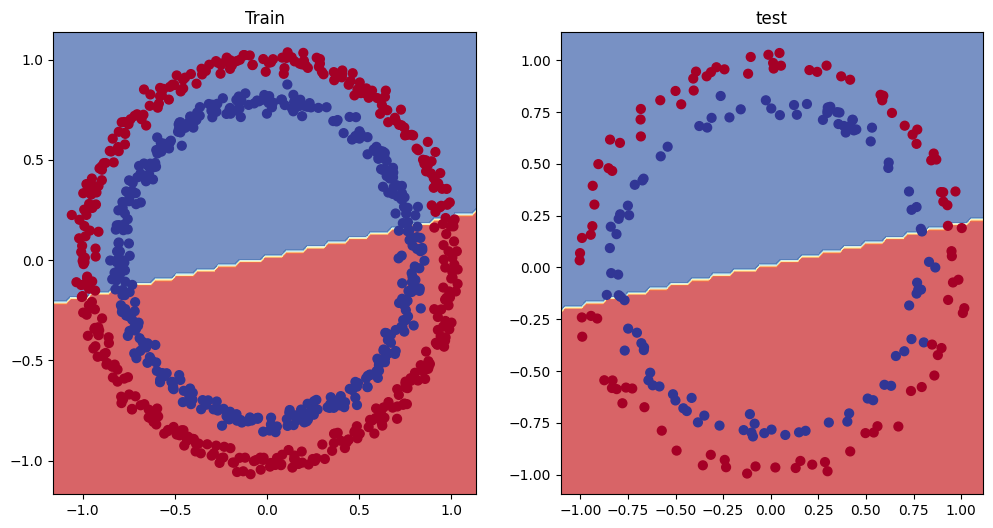

In [139]:
# plot decision boundary of the model
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title('Train')
plot_decision_boundary(model_1, X_train, y_train)
plt.subplot(1,2,2)
plt.title('test')
plot_decision_boundary(model_1, X_test, y_test)

### 4.8 Preparing data to see if our model can fit a straight line
one wat to troubleshoot to a larger problem is to test out a smaller problem

In [140]:
# Create some data
weight = 0.7
bias = 0.3
start = 0
end = 1
step = 0.01

# Create data
X_regression = torch.arange(start,end,step).unsqueeze(dim=1)
y_regression = weight*X_regression+bias
print(len(X_regression))
X_regression[:5], y_regression[:5]

100


(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400]]),
 tensor([[0.3000],
         [0.3070],
         [0.3140],
         [0.3210],
         [0.3280]]))

In [141]:
# Split the data
train_split = int(0.8*len(X_regression))
X_train_regression, y_train_regression = X_regression[:train_split], y_regression[:train_split]
X_test_regression, y_test_regression = X_regression[train_split:], y_regression[train_split:]

# Check the length
len(X_train_regression), len(y_train_regression), len(X_test_regression), len(y_test_regression)

(80, 80, 20, 20)

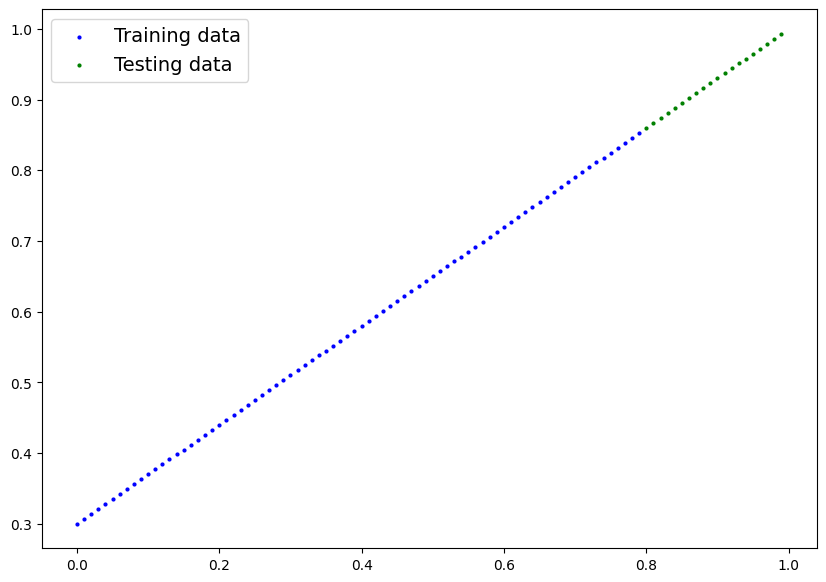

In [142]:
plot_predictions(train_data=X_train_regression,
                 train_labels=y_train_regression,
                 test_data=X_test_regression,
                 test_labels=y_test_regression)

In [143]:
model_1

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [144]:
X_train_regression[:10], y_train_regression[:10]

(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400],
         [0.0500],
         [0.0600],
         [0.0700],
         [0.0800],
         [0.0900]]),
 tensor([[0.3000],
         [0.3070],
         [0.3140],
         [0.3210],
         [0.3280],
         [0.3350],
         [0.3420],
         [0.3490],
         [0.3560],
         [0.3630]]))

In [145]:
X_train_regression.shape

torch.Size([80, 1])

In [146]:
# Adjusting 'model_1' to fit a straight line

# Same architecture as model_1 but using nn.Sequential()
model_2 = nn.Sequential(
    nn.Linear(in_features=1, out_features=10),
    nn.Linear(in_features=10, out_features=10),
    nn.Linear(in_features=10, out_features=1),
).to(device)
model_2


Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): Linear(in_features=10, out_features=10, bias=True)
  (2): Linear(in_features=10, out_features=1, bias=True)
)

In [147]:
# loss and optimizer
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params=model_2.parameters(),
                            lr=0.01)

In [148]:
# Train the model
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Set the epochs
epochs = 1000

# put the data on the target device
X_train_regression, y_train_regression = X_train_regression.to(device), y_train_regression.to(device)
X_test_regression, y_test_regression = X_test_regression.to(device), y_test_regression.to(device)

# Traininig
for epoch in range(epochs):
    y_pred = model_2(X_train_regression)
    loss = loss_fn(y_pred, y_train_regression)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    #Testing
    model_2.eval()
    with torch.inference_mode():
        test_pred = model_2(X_test_regression)
        test_loss = loss_fn(test_pred, y_test_regression)
        
    # Print
    if epoch % 100 == 0:
        print(f'Epoch:{epoch} | Loss:{loss:.5f} | Test loss : {test_loss:.5f}')

Epoch:0 | Loss:0.75986 | Test loss : 0.91103
Epoch:100 | Loss:0.02858 | Test loss : 0.00081


Epoch:200 | Loss:0.02533 | Test loss : 0.00209
Epoch:300 | Loss:0.02137 | Test loss : 0.00305
Epoch:400 | Loss:0.01964 | Test loss : 0.00341
Epoch:500 | Loss:0.01940 | Test loss : 0.00387
Epoch:600 | Loss:0.01903 | Test loss : 0.00379
Epoch:700 | Loss:0.01878 | Test loss : 0.00381
Epoch:800 | Loss:0.01840 | Test loss : 0.00329
Epoch:900 | Loss:0.01798 | Test loss : 0.00360


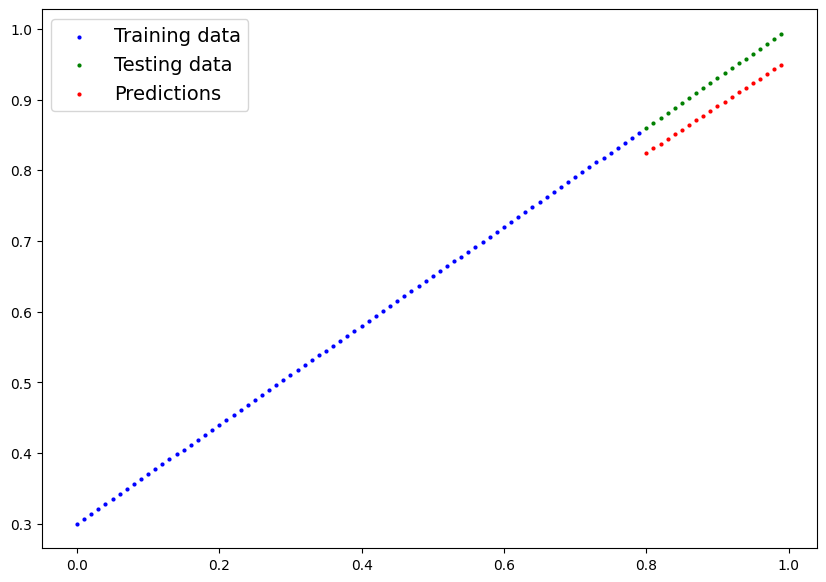

In [149]:
# Turn on evaluate mode
model_2.eval()

# make prediction
with torch.inference_mode():
    y_preds = model_2(X_test_regression)
    
# Plot data
plot_predictions(train_data=X_train_regression.cpu(),
                 train_labels=y_train_regression.cpu(),
                 test_data=X_test_regression.cpu(),
                 test_labels=y_test_regression.cpu(),
                 predictions=y_preds.cpu())

### 4.7 Non-linerarity

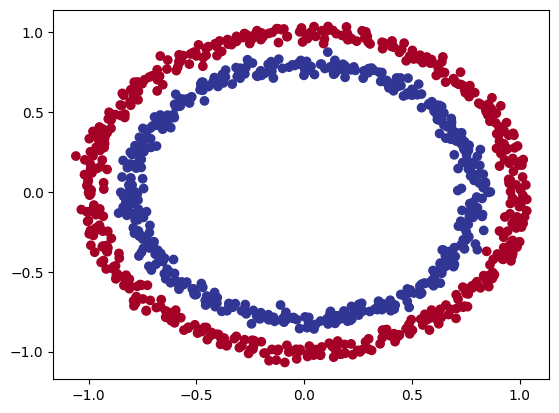

In [150]:
# Recreating non-linear data(red and blue circles)
from sklearn.datasets import make_circles

n_samples = 1000

X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

plt.scatter(X[:,0],X[:,1],c=y, cmap=plt.cm.RdYlBu)

In [151]:
# Conver data to tensors and then to train and test splits
from torch import nn
from sklearn.model_selection import train_test_split

# Turn data into tensors
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)
X_train[:5], y_train[:5]

(tensor([[ 0.6579, -0.4651],
         [ 0.6319, -0.7347],
         [-1.0086, -0.1240],
         [-0.9666, -0.2256],
         [-0.1666,  0.7994]]),
 tensor([1., 0., 0., 0., 1.]))

### Building a model with non-linearity
* Linear = straight Linear
* Non-linear = non-straight lines

Artificial Neural network are a large combination of linear and non-linear functions to find patterns in data

In [152]:
# build a model with non-linear activation function
from torch import nn
class CircleModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2, out_features=10)
        self.layer_2 = nn.Linear(in_features=10, out_features=10)
        self.layer_3 = nn.Linear(in_features=10, out_features=1)
        self.relu = nn.ReLU() # relu is a non-linear activation function
        
    
    def forward(self,x):
        # where should we put our non-linear activation functions
        return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))
model_3 = CircleModelV2().to(device)
model_3

CircleModelV2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [153]:
# Setup loss and optimizer 
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(params=model_3.parameters(),
                            lr=0.1)

In [154]:
X_train, X_train.shape

(tensor([[ 0.6579, -0.4651],
         [ 0.6319, -0.7347],
         [-1.0086, -0.1240],
         ...,
         [ 0.0157, -1.0300],
         [ 1.0110,  0.1680],
         [ 0.5578, -0.5709]]),
 torch.Size([800, 2]))

In [155]:
# Random seeds
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Put all data on target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

epochs = 1000

for epoch in range(epochs):
    # Train
    model_3.train()
    
    # 1. Forwad()
    y_logits = model_3(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits))
    
    # 2. Calcluate the loss
    loss = loss_fn(y_logits, y_train)
    acc = accuracy_fn(y_true=y_train,
                      y_pred=y_pred)    

    # 3. Optimizer zero grad
    optimizer.zero_grad()
    
    # 4. loss backward (backpropagation)
    loss.backward()
    
    # 5. Optimizer step (gradient descent)
    optimizer.step()
    
    # Test
    model_3.eval()
    with torch.inference_mode():
        test_logits = model_3(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))
        
        test_loss = loss_fn(test_logits, y_test)
        test_acc  = accuracy_fn(y_true=y_test,
                                y_pred=test_pred)
        
    # Print
    if epoch % 100 == 0:
        print(f'Epoch:{epoch} | Loss:{loss:.5f} |  Acc :{acc:.2f} | Test loss : {test_loss:.5f} | Test acc : {test_acc:.2f}')

Epoch:0 | Loss:0.69295 |  Acc :50.00 | Test loss : 0.69319 | Test acc : 50.00
Epoch:100 | Loss:0.69115 |  Acc :52.88 | Test loss : 0.69102 | Test acc : 52.50
Epoch:200 | Loss:0.68977 |  Acc :53.37 | Test loss : 0.68940 | Test acc : 55.00
Epoch:300 | Loss:0.68795 |  Acc :53.00 | Test loss : 0.68723 | Test acc : 56.00
Epoch:400 | Loss:0.68517 |  Acc :52.75 | Test loss : 0.68411 | Test acc : 56.50
Epoch:500 | Loss:0.68102 |  Acc :52.75 | Test loss : 0.67941 | Test acc : 56.50
Epoch:600 | Loss:0.67515 |  Acc :54.50 | Test loss : 0.67285 | Test acc : 56.00
Epoch:700 | Loss:0.66659 |  Acc :58.38 | Test loss : 0.66322 | Test acc : 59.00
Epoch:800 | Loss:0.65160 |  Acc :64.00 | Test loss : 0.64757 | Test acc : 67.50
Epoch:900 | Loss:0.62362 |  Acc :74.00 | Test loss : 0.62145 | Test acc : 79.00


In [156]:
# Make prediction
model_3.eval()
with torch.inference_mode():
    y_preds = torch.round(torch.sigmoid(model_3(X_test))).squeeze()
y_preds[:10],y_test[:10]

(tensor([1., 0., 1., 0., 0., 1., 0., 0., 1., 0.], device='cuda:0'),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.], device='cuda:0'))

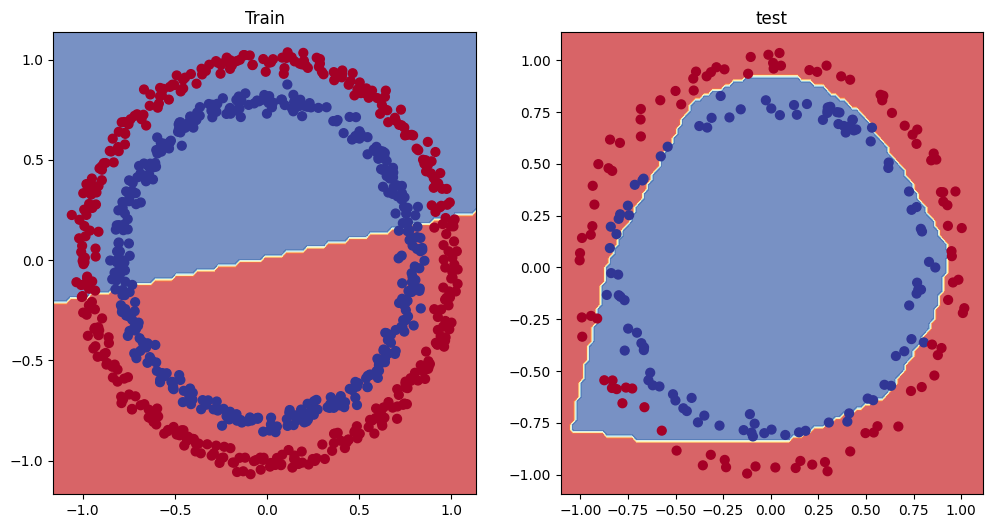

In [157]:
# Plot descision boundaries
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title('Train')
plot_decision_boundary(model_1,X_train, y_train) # model_1 = no non-linearity
plt.subplot(1,2,2)
plt.title('test')
plot_decision_boundary(model_3,X_test,y_test) # model_3 = has non-linearity

### 4.8 Replicating non-linear activation function

In [158]:
# Create a tensor
A = torch.arange(-10,10,1)
A, A.dtype

(tensor([-10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,   1,   2,   3,
           4,   5,   6,   7,   8,   9]),
 torch.int64)

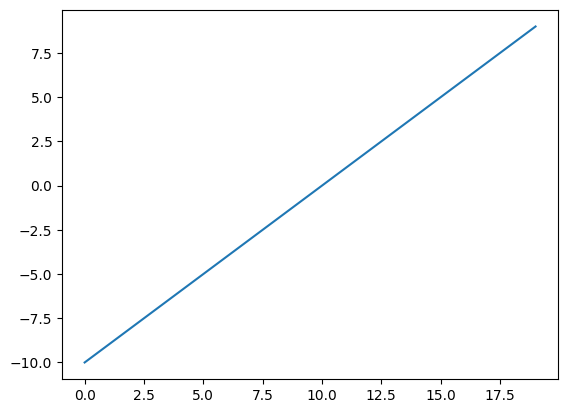

In [159]:
# Visualize the tensor
plt.plot(A)

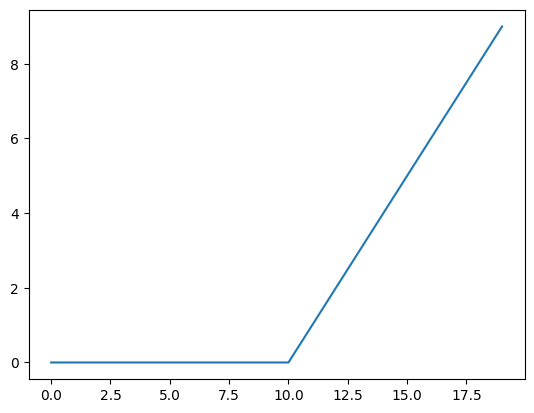

In [160]:

plt.plot(torch.relu(A))

In [161]:
A

tensor([-10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,   1,   2,   3,
          4,   5,   6,   7,   8,   9])

In [162]:
def relu(x) -> torch.tensor:
    return torch.maximum(torch.tensor(0), x) # inputs must be tensors
relu(A)

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

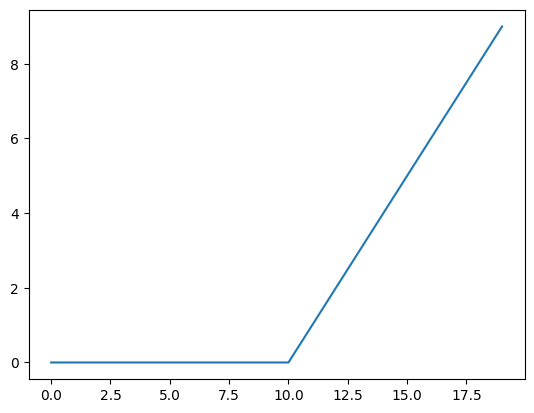

In [163]:
# Plot Relu activiation function
plt.plot(relu(A))

In [164]:
# Now let's do the same for sigmoid
def sigmoid(x):
    return 1 / (1 + torch.exp(-x))

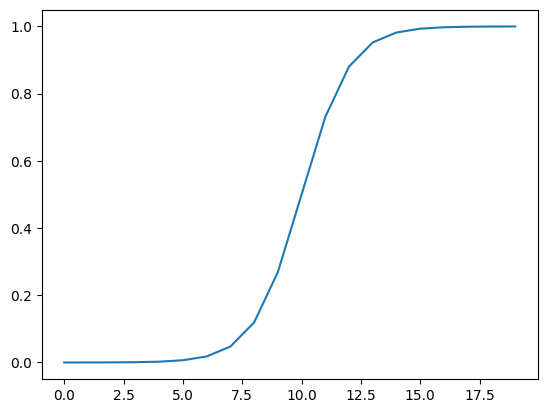

In [165]:
plt.plot(torch.sigmoid(A))

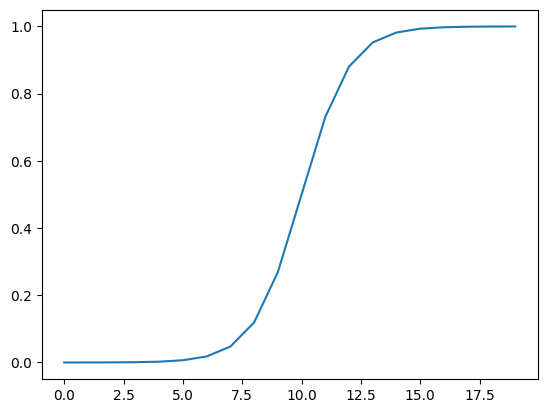

In [166]:
plt.plot(sigmoid(A))

### 4.9 Multi-class classification

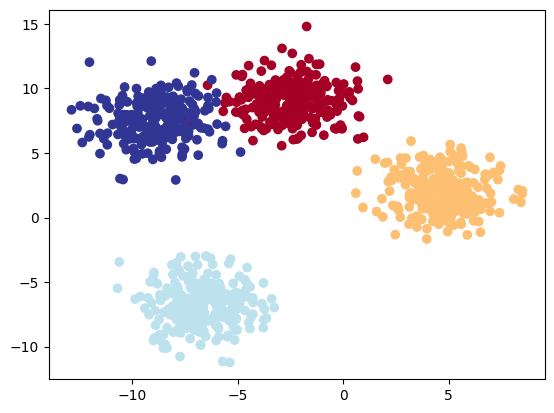

In [167]:
import torch
from torch import nn
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

# Set the hyperparameter for data creation
NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 42

# 1. Create multi-class data
X_blob, y_blob = make_blobs(n_samples=1000,
                            n_features=NUM_FEATURES,
                            centers=NUM_CLASSES,
                            cluster_std=1.5, # give the clusters a little shake up
                            random_state=RANDOM_SEED 
                            )

# 2. Turn data into tensors
X_blob = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.LongTensor) #.type(torch.float) <-- errors by train and test loop

# 3. Split into train and test
X_blob_train,  X_blob_test, y_blob_train, y_blob_test = train_test_split(X_blob,
                                                                        y_blob,
                                                                        test_size=0.2,
                                                                        random_state=RANDOM_SEED)

# 4. plot data (visualize)
plt.figure(figure=(10,7))
plt.scatter(X_blob[:,0],X_blob[:,1],c=y_blob, cmap=plt.cm.RdYlBu)


In [168]:
# Create device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [169]:
# build a multi-class classification model
class BlobModel(nn.Module):
    def __init__(self, input_features, out_features, hidden_units=8):
        '''
        Initializes multi-class classification model
        
        Args:
            input_features (int) : Number of input features to the model
            out_features (int) : Number of outputs features (number of output classes)
            hidden_units (int) : Number of hidden units between layers
            
        Return:
        
        Examples:
        '''
        super().__init__()
        self.linear_layer_stack = nn.Sequential(
            nn.Linear(in_features=input_features, out_features=hidden_units),
            nn.ReLU(), # if skipping ReLU, you can see the same result
            nn.Linear(in_features=hidden_units, out_features=hidden_units),
            nn.ReLU(), # if skipping ReLU, you can see the same result
            nn.Linear(in_features=hidden_units, out_features=out_features)
            
        )
    def forward(self, x):
        return self.linear_layer_stack(x)
    
model_4 = BlobModel(input_features=2,
                    out_features=4,
                    hidden_units=8).to(device)
model_4      
        

BlobModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=8, bias=True)
    (3): ReLU()
    (4): Linear(in_features=8, out_features=4, bias=True)
  )
)

In [170]:
X_blob_train.shape, y_blob_train[:5]

(torch.Size([800, 2]), tensor([1, 0, 2, 2, 0]))

In [171]:
torch.unique(y_blob_train)

tensor([0, 1, 2, 3])

In [172]:
# Create loss function and optimizer for a multi-class classification
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_4.parameters(),
                            lr=0.1)

In [173]:
next(model_4.parameters()).device

device(type='cuda', index=0)

In [174]:
X_blob_test.device

device(type='cpu')

In [175]:
X_blob_test.shape

torch.Size([200, 2])

In [176]:
# raw output
model_4.eval()
with torch.inference_mode():
    y_logits = model_4(X_blob_test.to(device))
y_logits[:10]

tensor([[-0.7646, -0.7412, -1.5777, -1.1376],
        [-0.0973, -0.9431, -0.5963, -0.1371],
        [ 0.2528, -0.2379,  0.1882, -0.0066],
        [-0.4134, -0.5204, -0.9303, -0.6963],
        [-0.3118, -1.3736, -1.1991, -0.3834],
        [-0.1497, -1.0617, -0.7107, -0.1645],
        [ 0.1539, -0.2887,  0.1520, -0.0109],
        [-0.2154, -1.1795, -0.9300, -0.2745],
        [ 0.2443, -0.2472,  0.1649,  0.0061],
        [-0.2329, -1.2120, -0.9849, -0.3004]], device='cuda:0')

In [177]:
y_blob_test[:10]

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0])

In [178]:
next(model_4.parameters()).device

device(type='cuda', index=0)

In [179]:
y_pred_probs = torch.softmax(y_logits, dim=1)
print(y_logits[:5])
print(y_pred_probs[:5])

tensor([[-0.7646, -0.7412, -1.5777, -1.1376],
        [-0.0973, -0.9431, -0.5963, -0.1371],
        [ 0.2528, -0.2379,  0.1882, -0.0066],
        [-0.4134, -0.5204, -0.9303, -0.6963],
        [-0.3118, -1.3736, -1.1991, -0.3834]], device='cuda:0')
tensor([[0.3169, 0.3244, 0.1405, 0.2182],
        [0.3336, 0.1432, 0.2026, 0.3206],
        [0.3011, 0.1843, 0.2823, 0.2323],
        [0.3078, 0.2766, 0.1836, 0.2320],
        [0.3719, 0.1286, 0.1532, 0.3463]], device='cuda:0')


In [180]:
y_pred_probs[:5]

tensor([[0.3169, 0.3244, 0.1405, 0.2182],
        [0.3336, 0.1432, 0.2026, 0.3206],
        [0.3011, 0.1843, 0.2823, 0.2323],
        [0.3078, 0.2766, 0.1836, 0.2320],
        [0.3719, 0.1286, 0.1532, 0.3463]], device='cuda:0')

In [181]:
torch.sum(y_pred_probs[0]), torch.sum(y_pred_probs)

(tensor(1., device='cuda:0'), tensor(200., device='cuda:0'))

In [182]:
torch.max(y_pred_probs[0]), torch.max(y_pred_probs)

(tensor(0.3244, device='cuda:0'), tensor(0.3925, device='cuda:0'))

In [183]:
# Convert model's prediction probabilities to prediction labels
y_preds = torch.argmax(y_pred_probs, dim=1)
y_preds

tensor([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 3, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 1, 0, 1, 0, 0, 0,
        0, 0, 0, 0, 3, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 0, 0, 0, 0, 1, 0, 1], device='cuda:0')

In [184]:
y_blob_test

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0, 0, 1, 0, 0, 0, 3, 3, 2, 3, 3, 3, 0, 1, 2,
        2, 2, 3, 0, 1, 0, 3, 1, 1, 3, 1, 2, 1, 3, 0, 2, 0, 3, 3, 2, 0, 3, 1, 1,
        0, 3, 1, 0, 1, 1, 3, 2, 1, 1, 3, 2, 2, 0, 3, 2, 2, 0, 0, 3, 3, 0, 0, 3,
        3, 3, 2, 3, 3, 3, 3, 1, 0, 2, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 1, 3, 3, 3,
        1, 0, 3, 2, 0, 0, 3, 0, 2, 3, 1, 0, 3, 2, 1, 1, 0, 2, 2, 3, 0, 0, 1, 2,
        2, 3, 0, 1, 2, 0, 0, 0, 2, 3, 1, 2, 3, 2, 0, 3, 0, 0, 1, 1, 1, 0, 2, 2,
        2, 2, 0, 3, 3, 2, 2, 1, 3, 2, 0, 0, 3, 3, 2, 1, 2, 0, 3, 2, 0, 3, 2, 0,
        2, 2, 2, 0, 3, 1, 1, 1, 1, 1, 3, 1, 0, 2, 2, 1, 2, 2, 0, 1, 2, 2, 0, 0,
        1, 3, 2, 0, 3, 1, 2, 1])

In [185]:
y_blob_train.dtype

torch.int64

In [186]:
y_blob_train.device

device(type='cpu')

In [187]:
# train and test loop
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs=100

X_blob_train, y_blob_train = X_blob_train.to(device), y_blob_train.to(device)
X_blob_test, y_blob_test = X_blob_test.to(device), y_blob_test.to(device)

for epoch in range(epochs):
    model_4.train()
    y_logits = model_4(X_blob_train)
    y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)
    loss = loss_fn(y_logits, y_blob_train)
    acc = accuracy_fn(y_true = y_blob_train,
                      y_pred= y_pred)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    model_4.eval()
    with torch.inference_mode():
        test_logits = model_4(X_blob_test)
        test_pred = torch.softmax(test_logits, dim=1).argmax(dim=1)
        
        test_loss = loss_fn(test_logits, y_blob_test)
        test_acc = accuracy_fn(y_true = y_blob_test,
                               y_pred= test_pred)
    
    # Print
    if epoch % 10 == 0:
        print(f'Epoch:{epoch} | Loss:{loss:.5f} |  Acc :{acc:.2f} | Test loss : {test_loss:.5f} | Test acc : {test_acc:.2f}')    
    

Epoch:0 | Loss:1.15883 |  Acc :40.38 | Test loss : 1.07554 | Test acc : 48.00
Epoch:10 | Loss:0.64476 |  Acc :96.75 | Test loss : 0.66069 | Test acc : 97.50
Epoch:20 | Loss:0.42535 |  Acc :98.50 | Test loss : 0.43074 | Test acc : 100.00
Epoch:30 | Loss:0.25294 |  Acc :99.12 | Test loss : 0.24508 | Test acc : 99.50
Epoch:40 | Loss:0.11232 |  Acc :99.25 | Test loss : 0.10229 | Test acc : 99.50
Epoch:50 | Loss:0.06627 |  Acc :99.25 | Test loss : 0.05848 | Test acc : 99.50
Epoch:60 | Loss:0.05068 |  Acc :99.25 | Test loss : 0.04293 | Test acc : 99.50
Epoch:70 | Loss:0.04300 |  Acc :99.25 | Test loss : 0.03491 | Test acc : 99.50
Epoch:80 | Loss:0.03836 |  Acc :99.25 | Test loss : 0.02988 | Test acc : 99.50
Epoch:90 | Loss:0.03525 |  Acc :99.25 | Test loss : 0.02663 | Test acc : 99.50


In [188]:
# Make prediction
model_4.eval()
with torch.inference_mode():
    y_logits = model_4(X_blob_test)
y_logits[:5]

tensor([[-0.6249,  5.9860, -7.6323, -8.4470],
        [-2.1738, -6.3750, -3.7202,  3.1203],
        [-3.4102, -3.8958,  3.1567, -2.6119],
        [-1.1505,  4.1962, -3.8472, -4.8820],
        [ 3.7548, -1.3391, -9.1422, -6.9466]], device='cuda:0')

In [189]:
y_pred_probs = torch.softmax(y_logits, dim=1)
y_pred_probs[:5]

tensor([[1.3438e-03, 9.9865e-01, 1.2164e-06, 5.3854e-07],
        [4.9905e-03, 7.4740e-05, 1.0630e-03, 9.9387e-01],
        [1.3985e-03, 8.6060e-04, 9.9463e-01, 3.1073e-03],
        [4.7389e-03, 9.9483e-01, 3.1956e-04, 1.1353e-04],
        [9.9388e-01, 6.0966e-03, 2.4904e-06, 2.2378e-05]], device='cuda:0')

In [190]:
y_preds = torch.argmax(y_pred_probs, dim=1)
y_preds[:5]

tensor([1, 3, 2, 1, 0], device='cuda:0')

In [191]:
y_blob_test[:5]

tensor([1, 3, 2, 1, 0], device='cuda:0')

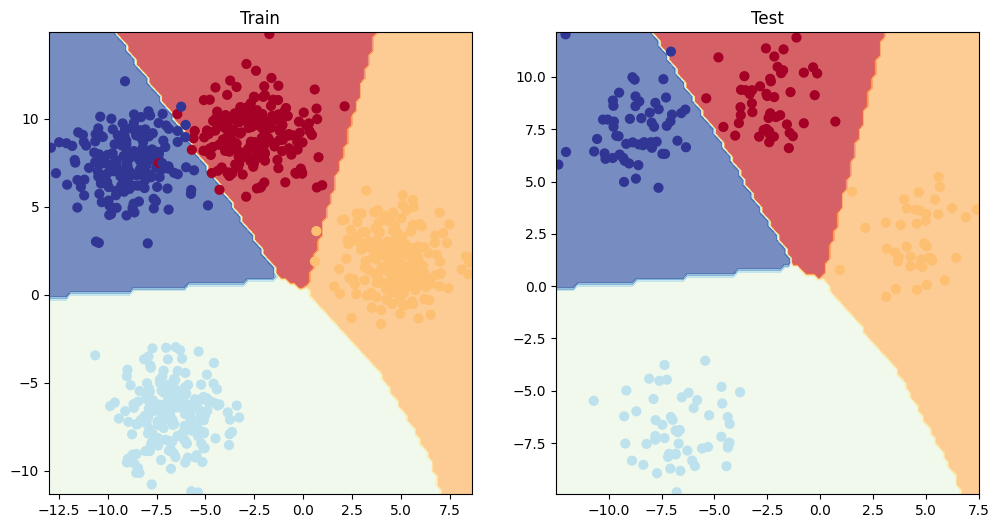

In [192]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_4, X_blob_train, y_blob_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_4, X_blob_test, y_blob_test)

### 4.10 Classification metrics
1. Accuracy
2. Precision
3. Recall
4. F1-scoll
5. Confusion matrix
6. classification report

In [193]:
try:
    from torchmetrics import Accuracy
except:
    !pip install torchmetrics # this is the version we're using in this notebook (later versions exist here: https://torchmetrics.readthedocs.io/en/stable/generated/CHANGELOG.html#changelog)
    from torchmetrics import Accuracy

# Setup metric and make sure it's on the target device
torchmetrics_accuracy = Accuracy(task='multiclass', num_classes=4).to(device)

# Calculate accuracy
torchmetrics_accuracy(y_preds, y_blob_test)

tensor(0.9950, device='cuda:0')